Power method / Power Iteration / Von Mises Iteration is an eigenvalue algorithm, given a diagonalizable matrix A. The algorithm wil prodice a number $\lambda$, which is the greatest (in absolute value) eigenvalue of A, and a nonzero vector v, which is a corresponding eigenvector of $\lambda$, that is $Av = \lambda v$

This algorithm is used to calculate the Google PageRank

a sparse matrix / sparse array: ma trận thưa thớt

Power iteration is a very simple algorithm, but it may converge slowly. The most time-consuming operation of the algorithm is the multiplication of matrix {\displaystyle A}A by a vector, so it is effective for a very large sparse matrix with appropriate implementation.

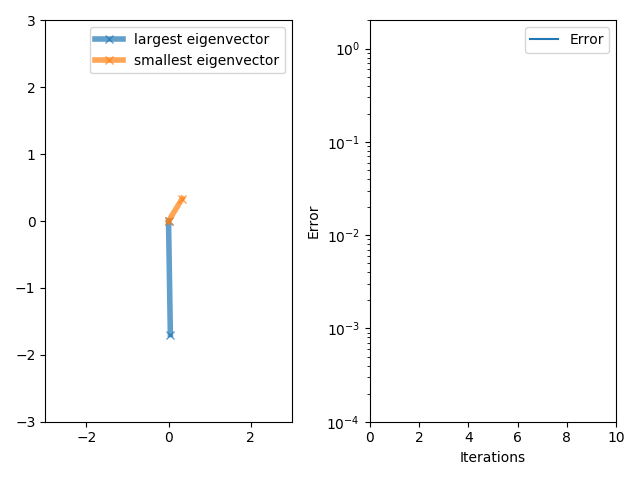

the power iteration algorithm on a 2x2 matrix. The matrix is depicted by its two eigenvectors. Error is computed as ||approximation - largest eigenvector||

The power iteration algorithm starts with a vector $b_0$, which may be an approximation to the dominant eigenvector or a random vector. The method is described by the recurrence relation

$b_{k+1} = \frac{Ab_k}{||Ab_k||}$

$Ab_k$: the matrix by vector product

$||Ab_k||$: the norm

So, at every iteration, the vector $b_k$ is multiplied by the matrix A and normalized.

In [4]:
import numpy as np

def power_iteration(A, num_simulations: int):
    matrix_cols = A.shape[1]
    
    # ideally choose a random vector to decrease the chance that
    # our vector is orthogonal to the eigenvector
    b_k = np.random.rand(matrix_cols)
    
    for _ in range(num_simulations):
        # calculate the matrix-by-vector product Ab
        Ab = np.dot(A, b_k)
        b_k1 = Ab
        
        # calculate the norm
        b_k1_norm = np.linalg.norm(b_k1)
        
        # re-normalize the vector
        b_k = b_k1 / b_k1_norm
    
    return b_k

In [5]:
vector = [[0.5, 0.5], [0.2, 0.8]]
arr_A = np.array(vector)

num_simulations = 10

vector_b_k = power_iteration(arr_A, num_simulations)
print(vector_b_k)

[0.7071065  0.70710706]


The power iteration method approximates only one eigenvalue of a matrix.

It remains useful for certain computational problems. For instance, calculate PageRank of documents in Google search engine, Twitter uses it to show users recommendations of whom to follow.

It is especially suitable for sparse matrices, such as the web matrix, or as the matrix-free method that does not require storing the coefficient matrix A explicitly, but can instead access a function evaluating matrix-vector products Ax.